In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]
from wordcloud import WordCloud, STOPWORDS
import scattertext as st
import re, io
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
tweets_df = pd.read_csv("Tweets.csv")

In [3]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
airlines=pd.unique(tweets_df['airline'])
airlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [5]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

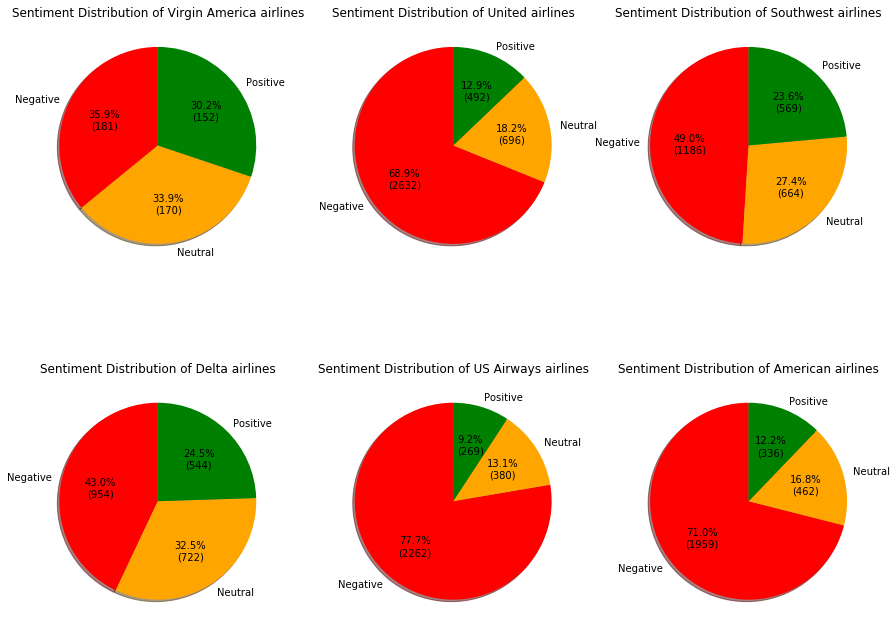

In [6]:
i=0
plt.figure(1,figsize=(15,12))
for airline in airlines:
    plt.subplot(2,3,i+1)
    airline_df = tweets_df[tweets_df['airline']==airline]
    count = airline_df['airline_sentiment'].value_counts()
    color = ['red','orange','green']
    labels='Negative','Neutral','Positive'
    #print(count)
    plt.pie(count.values,labels=labels, colors=color, shadow=True, startangle=90,autopct=lambda pct: func(pct, count.values))
    plt.title('Sentiment Distribution of' + " " + airline+" airlines")
    i+=1
plt.savefig('pie.png')
plt.show()

In [7]:
new_stop_words=STOPWORDS.copy()
new_stop_words.add('jetblue')
new_stop_words.add('virginamerica')
new_stop_words.add('americanair')
new_stop_words.add('southwestair')
new_stop_words.add('united')
new_stop_words.add('usairway')
new_stop_words.add('amp')
new_stop_words.add('usairways')
new_stop_words.add('flight')
new_stop_words.add('flights')
new_stop_words.add('thanks')
new_stop_words.add('thank')
new_stop_words.add('now')
new_stop_words.add('help')
new_stop_words.add('hour')
new_stop_words.add('co')
new_stop_words.add('will')
new_stop_words.add('s')
new_stop_words.add('t')

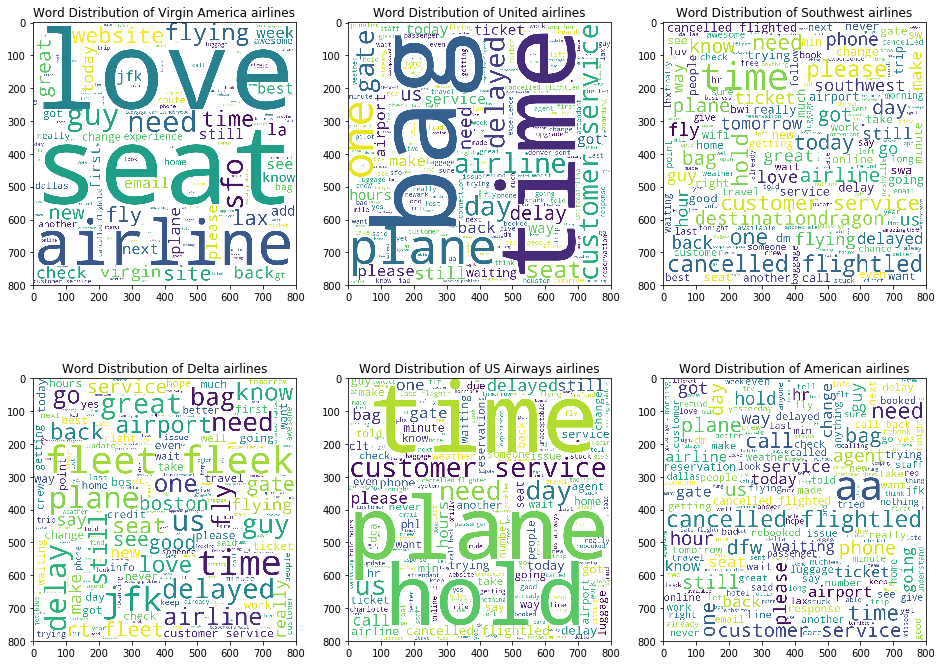

In [27]:
j=0
for airline in airlines:
    #print(i)
    plt.subplot(2,3,j+1)
    j+=1
    airline_df = tweets_df[tweets_df['airline']==airline]
    comment_words=""
    for val in airline_df['text']:
        
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
          
        for words in tokens: 
            comment_words = comment_words + words + ' '
  
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = new_stop_words, 
                min_font_size = 10).generate(comment_words) 
  
           
    #plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title("Word Distribution of "+airline+" airlines")
    #plt.axis("off") 
    #plt.tight_layout(pad = 0) 
plt.figure(1,figsize=(15,12))
plt.savefig('wordcloud.png')
plt.show()

In [9]:
nlp = spacy.load('en')

In [10]:
temp_df=tweets_df.copy()
#temp_df['parsed'] = temp_df.text.apply(nlp)
temp_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

In [12]:
temp_df['text'] = temp_df['text'].apply(lambda x: x.lower())

In [13]:
for airline in airlines:
    if(airline=="Virgin America"):
        va_df = temp_df[temp_df['airline']==airline]
    elif(airline=='United'):
        united_df = temp_df[temp_df['airline']==airline]

In [14]:
parsed=[]
for val in temp_df['text']:        
    val = str(val) 
    tokens = tokenizer.tokenize(val)
    final_tokens=''
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    #for i in range(len(tokens)): 
        #tokens[i] = porter_stemmer.stem(tokens[i])
    #for i in range(len(tokens)): 
        #tokens[i] = wordnet_lemmatizer.lemmatize(tokens[i])
    for i in range(len(tokens)): 
        if(tokens[i] not in new_stop_words):
            final_tokens=final_tokens+" "+tokens[i]+" "
    #print(final_tokens)
    parsed.append(final_tokens)

In [15]:
temp_df['clean_text']=parsed
temp_df['parsed'] = temp_df['clean_text'].apply(nlp)

In [16]:
def create_nlp_model(temp_df,nlp):
    parsed=[]
    for val in temp_df['text']:        
        val = str(val) 
        tokens = tokenizer.tokenize(val)
        final_tokens=''
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        #for i in range(len(tokens)): 
            #tokens[i] = porter_stemmer.stem(tokens[i])
        #for i in range(len(tokens)): 
            #tokens[i] = wordnet_lemmatizer.lemmatize(tokens[i])
        for i in range(len(tokens)): 
            if(tokens[i] not in new_stop_words):
                final_tokens=final_tokens+" "+tokens[i]+" "
        #print(final_tokens)
        parsed.append(final_tokens)
    temp_df['clean_text']=parsed
    temp_df['parsed'] = temp_df['clean_text'].apply(nlp)
    return temp_df

In [17]:
va_df=create_nlp_model(va_df,nlp)
united_df=create_nlp_model(united_df,nlp)

In [18]:
corpus = st.CorpusFromParsedDocuments(va_df, category_col='airline_sentiment', parsed_col='parsed').build()

In [19]:
html = produce_scattertext_explorer(corpus,
                                    category='positive',
                                    category_name='Positive',
                                    not_category_name='Negative',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5, transform=st.Scalers.scale, metadata=va_df['name'])
file_name = 'output/tweets_scatter.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [20]:
NR_Count = dict(temp_df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        NR_df=df
    else:
        NR_df=temp_df[temp_df['airline']==Airline]
    count=dict(NR_df['negativereason'].value_counts())
    Unique_reason=list(temp_df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    NR_df=NR_Count(Airline)
    count=NR_df['count']
    Index = range(1,(len(NR_df)+1))
    plt.bar(Index,count,color = ['#1b9e77', '#a9f971', '#fdaa48'])
    plt.xticks(Index,NR_df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title(Airline+" airlines negative reason count")

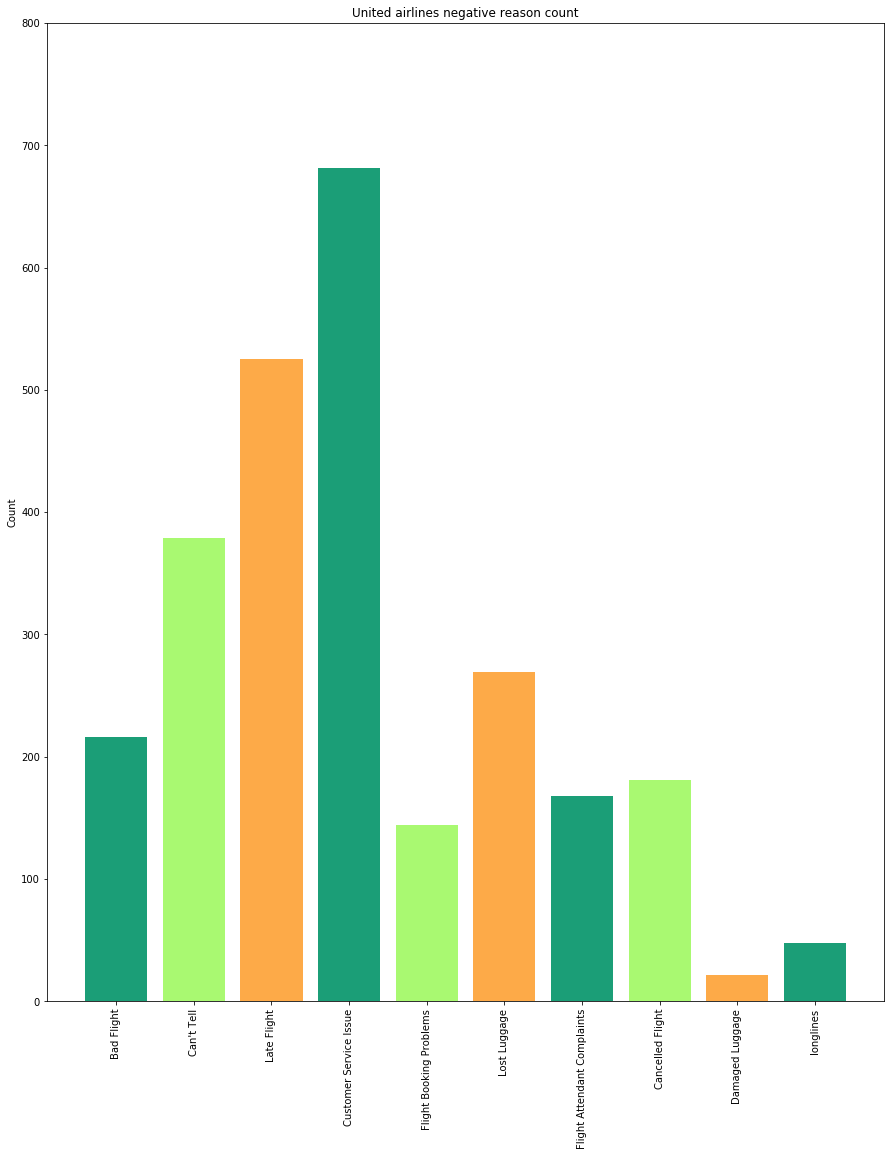

In [21]:
#airline_names = df['airline'].unique()
plt.figure(1,figsize=(15,18))
#plt.subplot(3,2,i+1)
plot_reason('United')
plt.xlabel('')
plt.ylim(0,800)
plt.savefig('united_reasons.png')
plt.show()

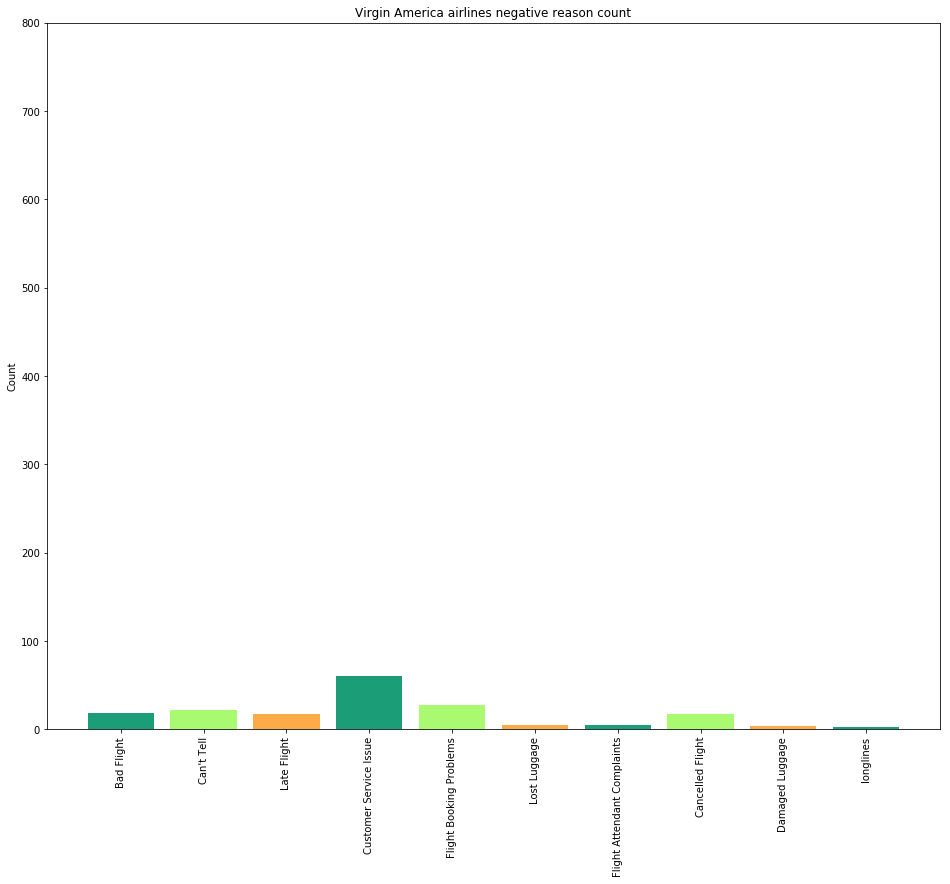

In [22]:
#airline_names = df['airline'].unique()
plt.figure(1,figsize=(16,13))
#plt.subplot(3,2,i+1)
plot_reason('Virgin America')
plt.xlabel('')
plt.ylim(0,800)
plt.show()